# feature engineering



In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

In [13]:
# read in the data
df_data = pd.read_csv('../rawdata/summit_county_public_record_001.csv')

In [15]:
df_data = pd.get_dummies(df_data, columns = ['city'], prefix = 'city')
df_data = pd.get_dummies(df_data, columns = ['property_type'], prefix = 'property_type')

In [16]:
df_data.head()

,tax_id,address,zip,beds,baths,sqft,year_built,sale_date,sale_price,file,...,city_Blue River,city_Breckenridge,city_Copper Mtn,city_Dillon,city_Frisco,city_Montezuma,city_Silverthorne,property_type_Condominium,property_type_Sfr,property_type_Townhouse
0,6508905,910 Copper RD Unit #210,80443,1,2,790,2000,2017-02-10,420000,2017,...,0,0,1,0,0,0,0,1,0,0
1,400372,317 S Fuller Placer RD,80424,3,5,4557,2018,2017-10-18,275100,2017,...,0,1,0,0,0,0,0,0,1,0
2,3001037,060 Tennis Club RD Unit #1605,80435,1,1,918,1977,2017-07-21,264000,2017,...,0,0,0,1,0,0,0,1,0,0
3,400233,1173 Ski Hill RD Unit #126,80424,2,2,780,1972,2017-05-04,380000,2017,...,0,1,0,0,0,0,0,1,0,0
4,3001255,22320 Us Highway 6 Unit #1766,80435,1,2,1168,1977,2017-07-13,395000,2017,...,0,0,0,1,0,0,0,1,0,0


In [19]:
df_data.columns

Index(['tax_id', 'address', 'zip', 'beds', 'baths', 'sqft', 'year_built',
       'sale_date', 'sale_price', 'file', 'sub_address', 'search_by_address',
       'geometry', 'lat', 'lng', 'sale_day', 'sale_month', 'sale_year',
       'duplicate', 'city_Blue River', 'city_Breckenridge', 'city_Copper Mtn',
       'city_Dillon', 'city_Frisco', 'city_Montezuma', 'city_Silverthorne',
       'property_type_Condominium', 'property_type_Sfr',
       'property_type_Townhouse'],
      dtype='object')

In [26]:
df_data = df_data[['beds', 'baths', 'sqft', 'year_built', 'sale_price', 'city_Blue River', 
                  'city_Breckenridge', 'city_Copper Mtn', 'city_Dillon', 'city_Frisco', 'city_Montezuma', 
                  'city_Silverthorne', 'property_type_Condominium', 'property_type_Sfr','property_type_Townhouse']]

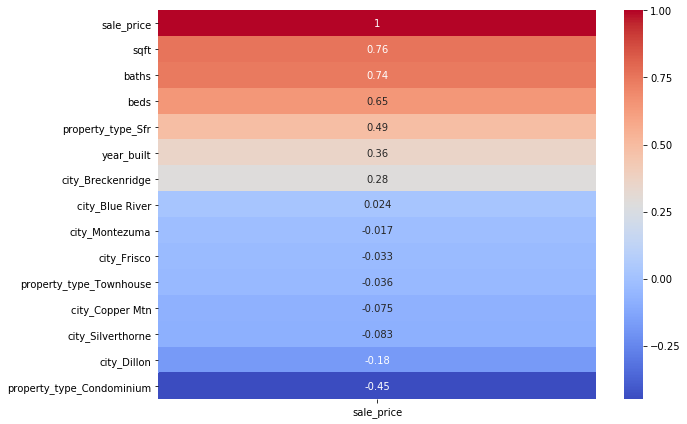

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df_data.corr()[['sale_price']].sort_values('sale_price', ascending=False ), cmap = 'coolwarm', annot = True)

plt.tight_layout()
plt.savefig('../image/heatmap_dummy_sale_price_001.png')    

In [28]:
X = df_data[['beds', 'baths', 'sqft', 'year_built', 'property_type_Sfr']]
y = df_data['sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_train)

cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()

model_score = model.score(X_test, y_test)

print(f'cv_score: {cv_score}')
print(f'model_score: {model_score}')

cv_score: 0.6017412002889404
model_score: 0.6206966361217614


In [ ]:
# save data frame, cleaned.
df_data.reset_index(drop = True, inplace = True)
df_data.to_csv('../rawdata/summit_county_public_record_002.csv', index = False)
